# Facebook Social Circles

In 2012, Julian McAuley and Jure Leskovec devised a novel method of identifying people's social circles by analyzing data collected from Facebook, Twitter and Google+.
In this case study, we will use the Facebook dataset -- which is provided alongside this notebook -- to perform some basic network analysis. 

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

We can load the dataset and save it into a table by executing the following code block.

In [2]:
facebook = pd.read_csv('facebook_combined.txt', sep=' ', names=['start_node', 'end_node'])
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


Each row in this table corresponds to an edge and each of the columns provide the starting and ending point of the edge, respectively. We can construct a graph
from this table using the following code block.

In [3]:
G = nx.from_pandas_edgelist(facebook, 'start_node', 'end_node')

You now have a graph of the social network -- this is an undirected, unweighted network where each node represents an anonymized Facebook user and each edge represents that they are friends on the platform. 

Please answer the following questions. Feel free to refer to the code examples shown in class and the networkx documentation.

### Overview [$\star$]

Find the number of nodes and edges in the graph

In [7]:
n_nodes = G.number_of_nodes() 
n_edges = G.number_of_edges() 

print(f"The number of nodes is {n_nodes} and edges is {n_edges}")

The number of nodes is 4039 and edges is 88234


### $k$ degrees of separation [$\star$]

We might be interested in seeing how many jumps it takes to go from one group of friends to another. Here, let's focus on a much simpler problem. If we start at some arbitrary node $a$, can we find another person $b$ in $k$ edge crossings?

In [6]:
source = 0
target = 3145
k = 3

# Your code here 
len(nx.shortest_path(G, source=0, target = 3145))

4

### Visualization [$\star$]

Choose a visualization method and produce a plot that captures the structure of the network. Describe what you have found.

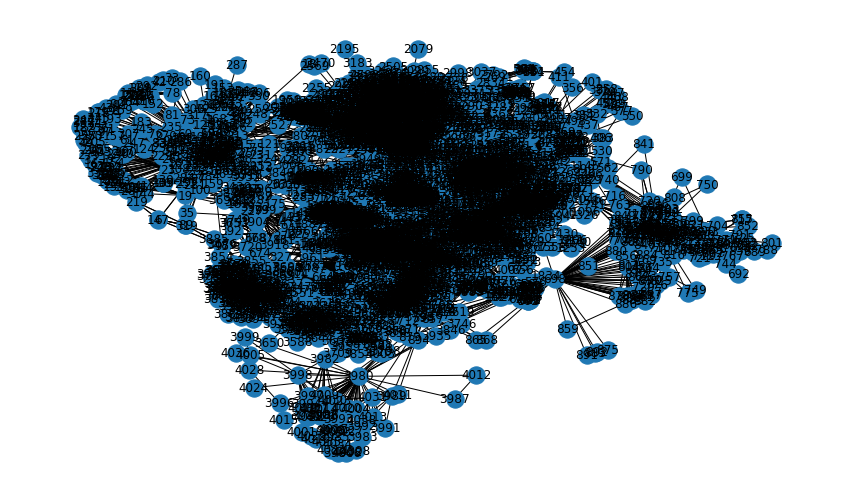

In [9]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax)

**Answer**:

### Shortest Paths [$\star$]

Many measures and metrics utilize the number of shortest paths from some node to another, or the length of the shortest paths. Calculate the length of the shortest
paths between all pairs of nodes.

In [10]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

Using the newly found information, find the length of the shortest path between nodes $5$ and $142$.

In [11]:
shortest_path_lengths[5][142]

2

### Triadic Closure [$\star \star$]

Consider three nodes $a,b$ and $c$ with edges $ab$ and $ac$. *Triadic closure* describes the tendency for the edge $bc$ to be formed in such a scenario. In our social network case, it means that it is common for people who have a mutual friend to be friends with each other. 

Calculate the number of triangles, transitivity score, the clustering coefficient and average clustering coefficient and plot the distribution of the clustering coefficient. Use this information to determine if there is any evidence of triadic closure in this social network.

In [12]:
nx.average_clustering(G)

0.6055467186200876

Text(0, 0.5, 'Counts')

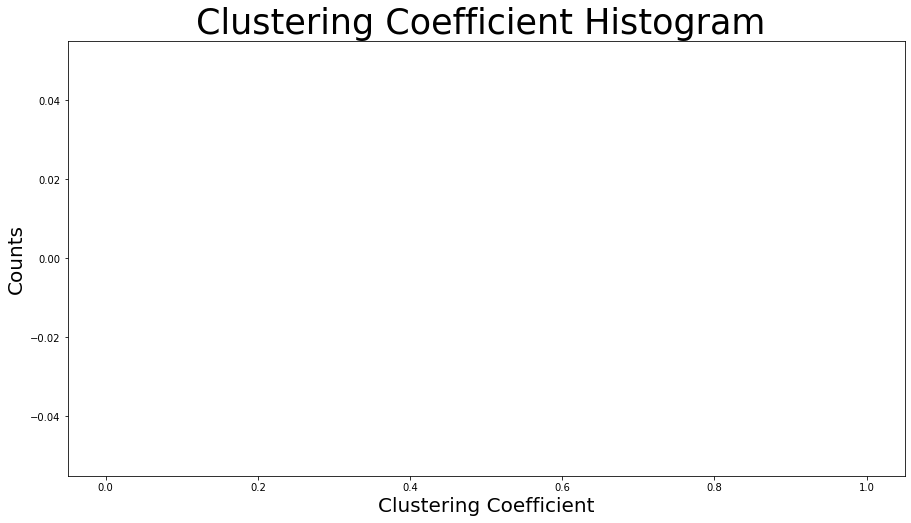

In [9]:
# Plotting the distribution
cluster_values = [] # Modify this

plt.figure(figsize=(15,8))
plt.hist(cluster_values, bins=50)
plt.title('Clustering Coefficient Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Clustering Coefficient', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

### Bridges [$\star \star$]

The existence of a bridge implies that two groups of friends are only connected through a single mutual friend, and the removal of that friend will disconnect
these two groups. 

Find the list of bridges and highlight them in a similar visualization of the network.

(0.0, 1.0, 0.0, 1.0)

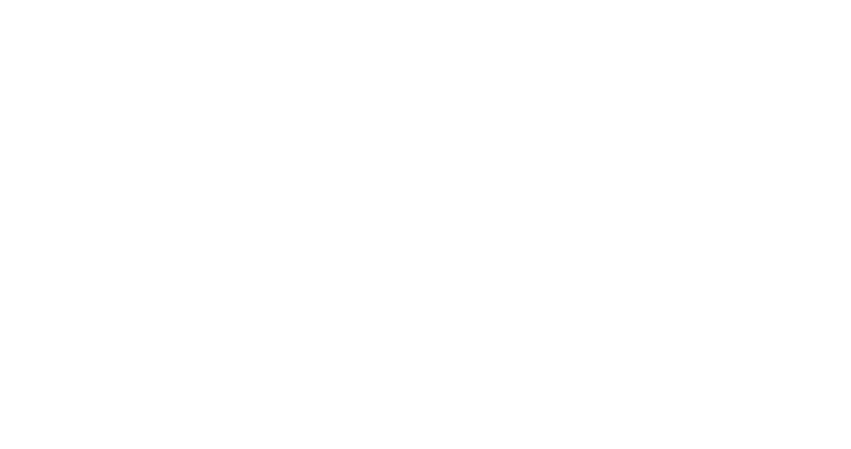

In [10]:
# Find the list of local bridges...
bridges = [] # your code here
# .. and find the list of normal bridges
local_bridges = [] # your code here

plt.figure(figsize=(15,8))
# Draw figure
# Draw edges only for local bridges
# Draw edges only for bridges
plt.axis('off')

### Popularity Contest [$\star \star \star$]

In the social network, the centrality score assigned to a particular node can be useful in determining the significance of the individual in that network.
First, find the degree centrality of all of the nodes in the network.

In [16]:
degree_centrality = # Your code here

Find the most popular $10$ nodes in this network.
*Hint: Look for sorting functions that are included in Python*

In [ ]:
# Your code here

Plot the degree distribution of the network.

In [ ]:
plt.figure(figsize=(15,8))
# Your code here
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])
plt.title('Degree Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

And finally, identify the nodes with the highest centralities.

(0.0, 1.0, 0.0, 1.0)

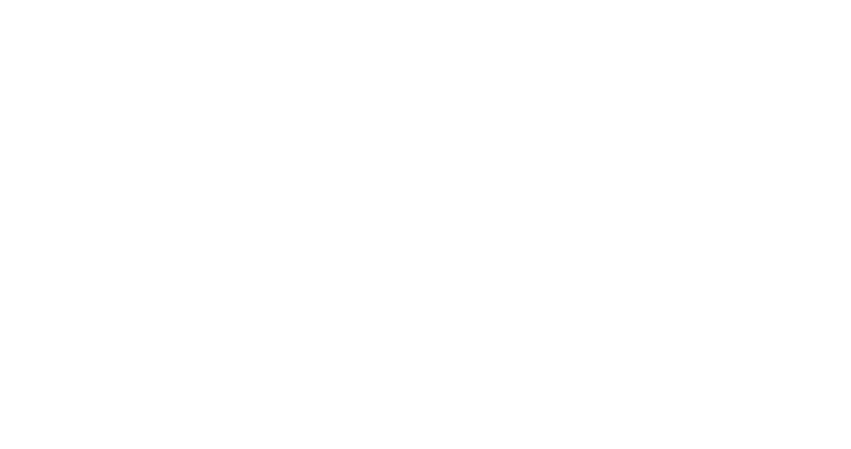

In [17]:
# Find the significant nodes here.
plt.figure(figsize=(15,8))
# Draw the figure here.
plt.axis('off')

Repeat this procedure for the eigenvector and betweenness centralities and comment on the results you have found.